In [3]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)
X = df
y = iris.target
print(len(y))

150


In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
X.iloc[51]

sepal length (cm)    6.4
sepal width (cm)     3.2
petal length (cm)    4.5
petal width (cm)     1.5
Name: 51, dtype: float64

In [7]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
clf = RandomForestClassifier(n_estimators=5, class_weight="balanced", oob_score=True, random_state=1)
clf.fit(X, y)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=True, random_state=1,
            verbose=0, warm_start=False)

In [7]:
clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1791095845, splitter='best')

In [8]:
dot_data = StringIO()
export_graphviz(clf.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=iris.feature_names, class_names=iris.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

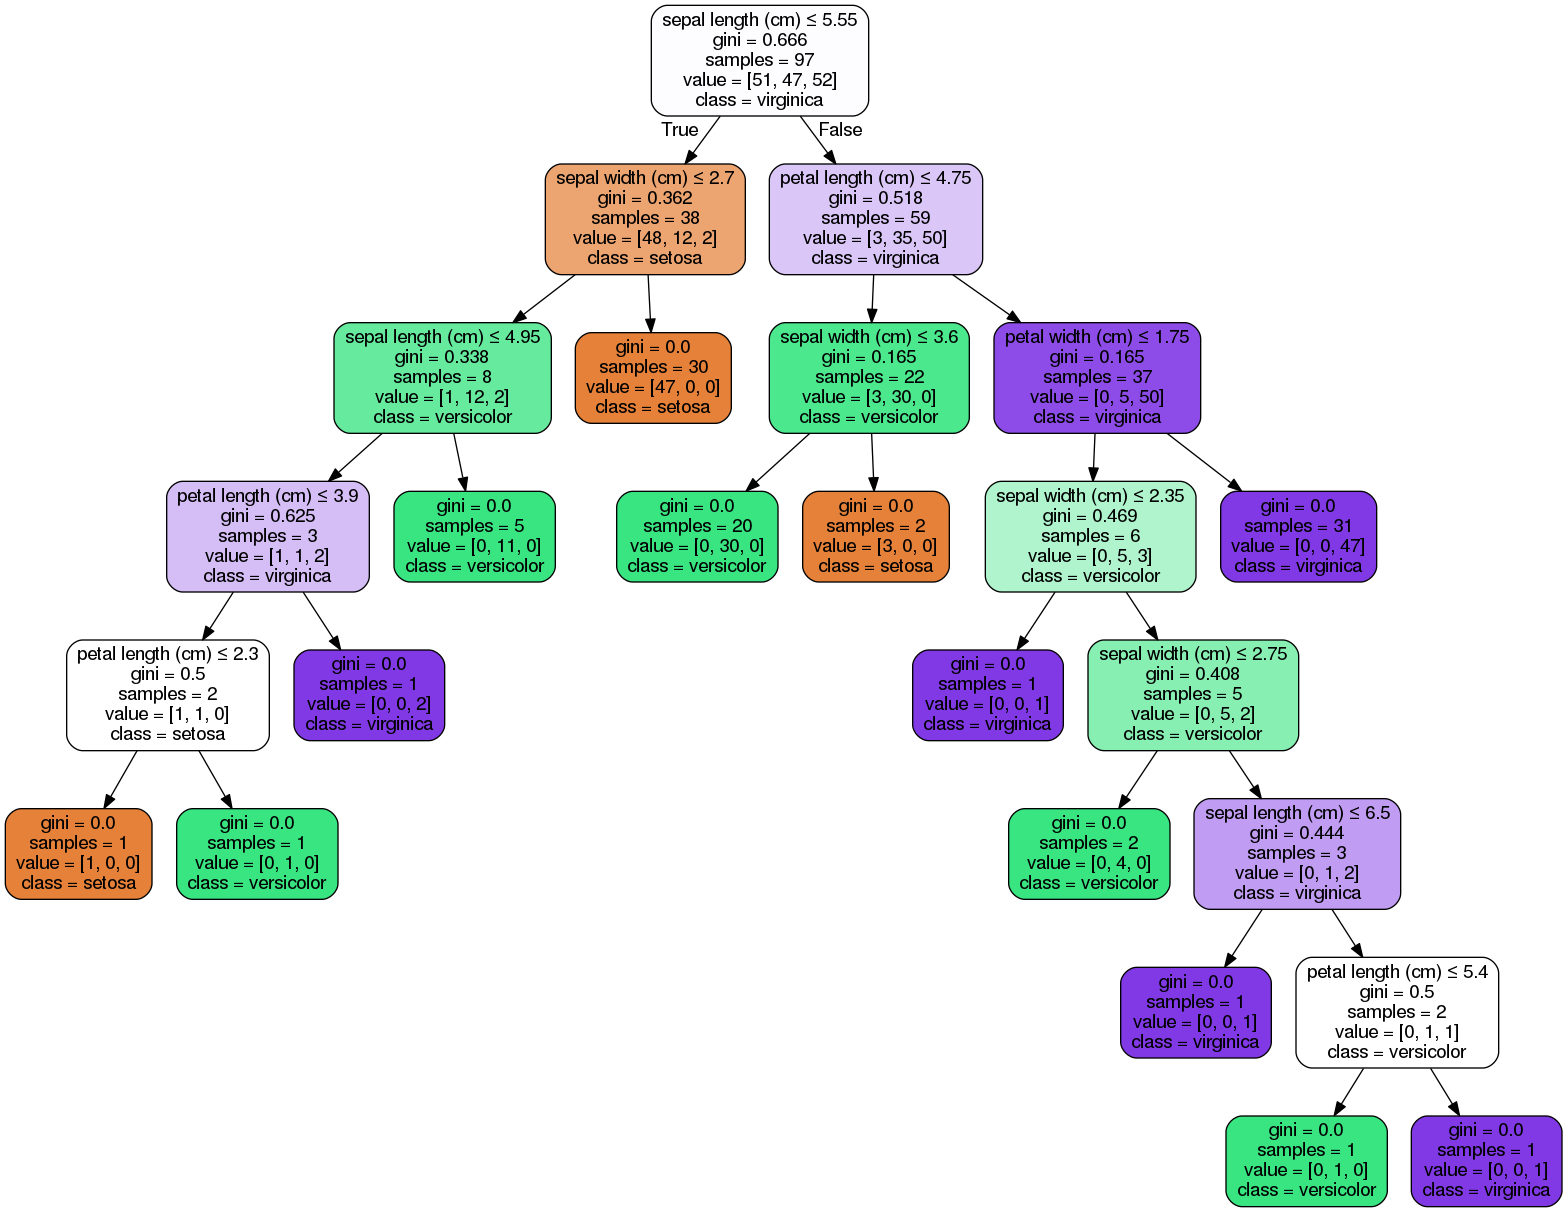

In [9]:
from IPython.display import Image
Image(graph.create_png())

In [9]:
color_schemes = ['aliceblue', 'antiquewhite', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond',  'blue',
              'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue',
              'cornsilk', 'crimson', 'cyan', 'darkgoldenrod', 'darkgreen', 'darkkhaki', 'darkolivegreen', 'darkorange',
              'darkorchid', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey',
              'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick',
              'floralwhite', 'forestgreen', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green',
              'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 
              'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrod', 
              'lightgoldenrodyellow', 'lightgray', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 
              'lightskyblue', 'lightslateblue', 'lightslategray', 'lightslategrey', 'lightsteelblue', 'lightyellow', 
              'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 
              'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 
              'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 
              'navyblue', 'oldlace', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
              'palevioletred', 'papayawhip', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 
              'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'skyblue', 
              'slateblue', 'slategray', 'slategrey', 'snow', 'springgreen', 'steelblue', 'tan', 'thistle', 'tomato', 
              'turquoise', 'violet', 'violetred', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen'
              ]

In [32]:
def _get_colors(num_classes, random_state=1):
    np.random.seed(random_state)
    color_index = np.random.randint(0, len(color_schemes), num_classes)
    colors =  np.array(color_schemes)[color_index]
    return colors


# https://stackoverflow.com/questions/48085315/interpreting-graphviz-output-for-decision-tree-regression
# https://stackoverflow.com/questions/42891148/changing-colors-for-decision-tree-plot-created-using-export-graphviz
# Color scheme info: http://wingraphviz.sourceforge.net/wingraphviz/language/colorname.htm
def visualize(estimator, feature_names=None, class_names=None, color_list=None, enable_node_id=True, seed=2):
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, filled=True, rounded=True,
                special_characters=True, feature_names=feature_names, class_names=class_names, node_ids=enable_node_id)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # if color is not assigned, pick color randomnly for the color list defined above
    color_names = color_list if color_list is not None else _get_colors(len(class_names), seed)
    print(color_names)
    default_color = 'cornsilk'

    # Query for the node list to change properties
    nodes = graph.get_node_list()
    for node in nodes:
        if node.get_name() not in ('node', 'edge'):
            values = estimator.tree_.value[int(node.get_name())][0]
            # 1. Color only the leaf nodes, One way to identify leaf nodes is to check on the values which
            #    should represent a distribution only for one class
            # 2. mixed nodes get the default color
            node.set_fillcolor(color_names[np.argmax(values)]) if max(values) == sum(values) \
                else node.set_fillcolor(default_color)

    # Query for the edge list to change properties
    edges = graph.get_edge_list()
    for ed in edges:
        ed.set_color('steelblue')
    return graph

In [33]:
g = visualize(clf.estimators_[0], feature_names=iris.feature_names, color_list=['coral', 'lightsteelblue','darkkhaki'],
              class_names=iris.target_names, enable_node_id=True, seed=5)

['coral', 'lightsteelblue', 'darkkhaki']


ValueError: invalid literal for int() with base 10: 'node'

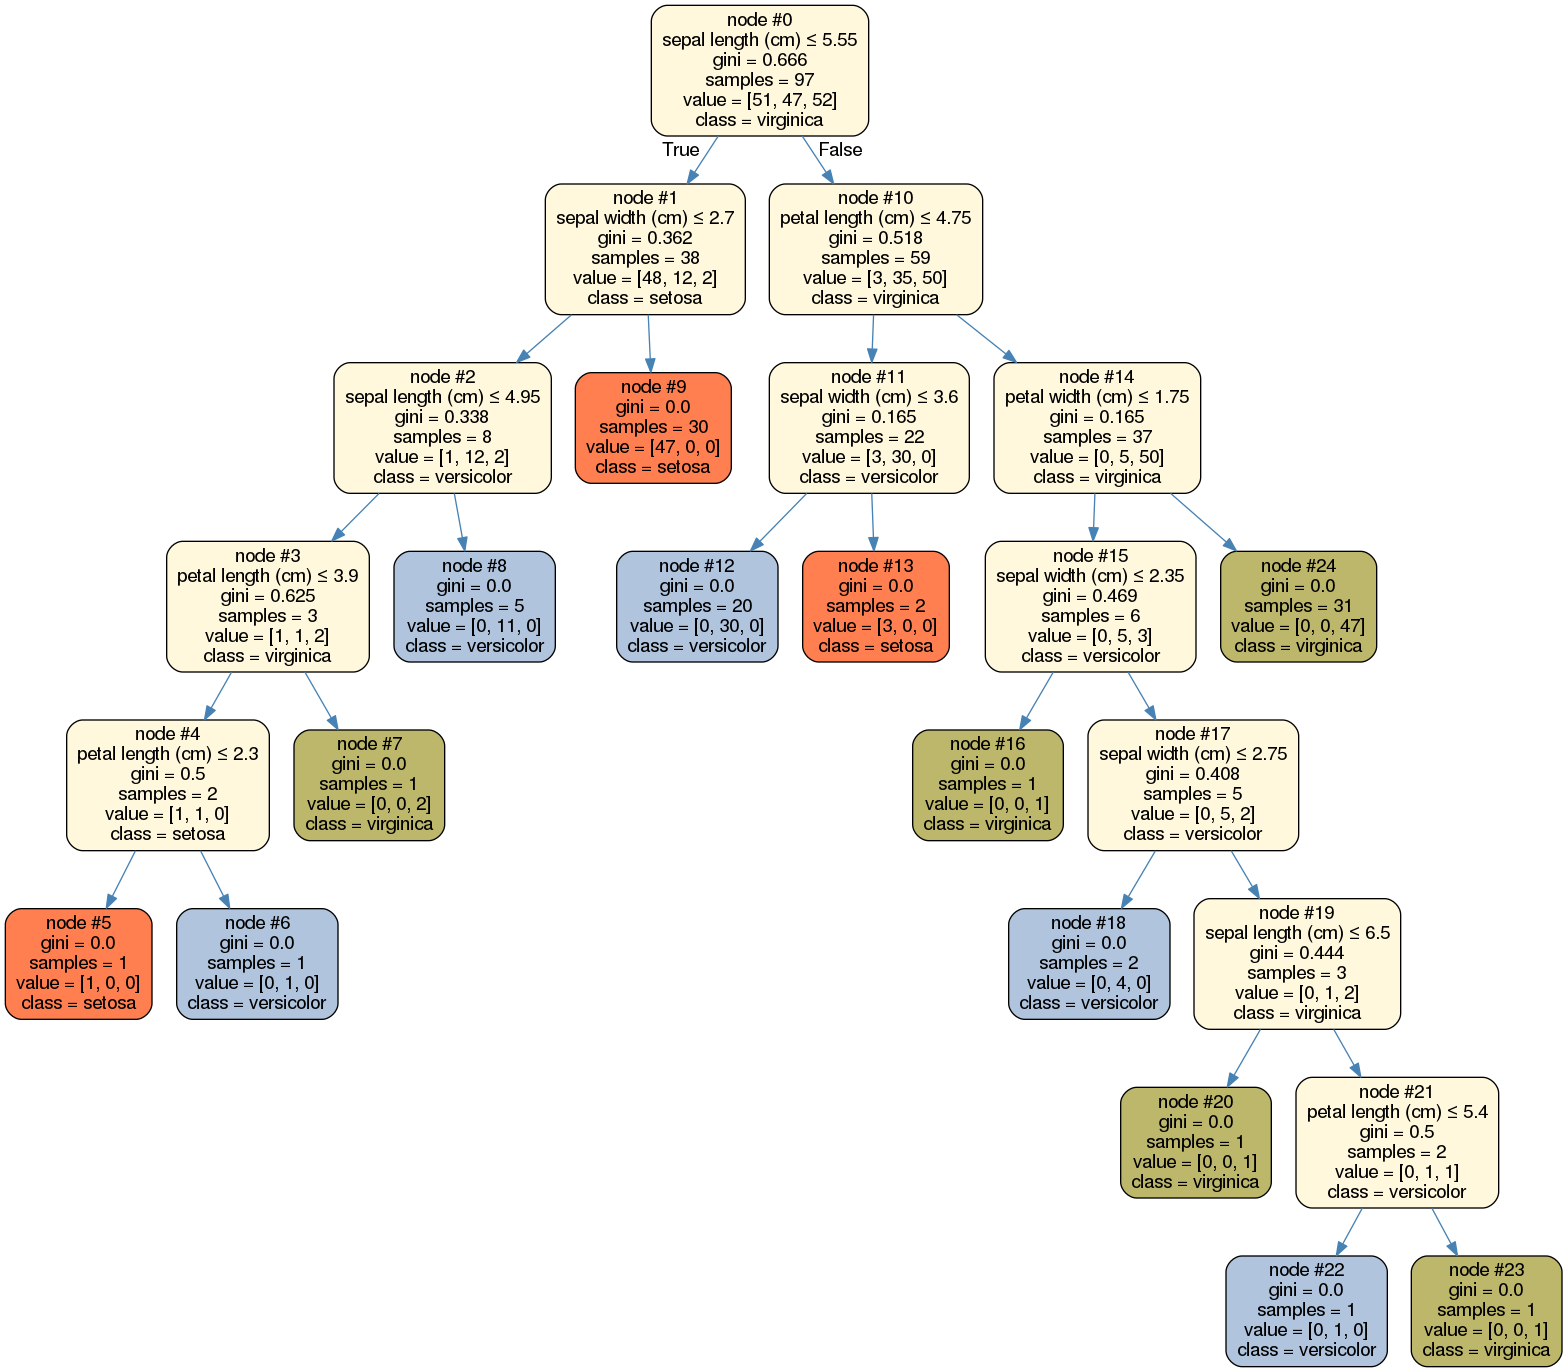

In [34]:
from IPython.display import Image
Image(g.create_png(), retina=True)

In [124]:
dot_data = StringIO()
export_graphviz(clf.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=iris.feature_names, 
                class_names=iris.target_names, node_ids=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
nodes = graph.get_node_list()
edges = graph.get_edge_list()

edges = graph.get_edge_list()
for ed in edges:
    ed.set_color('blue')

default_color = 'cornsilk'
np.random.seed(1)
color_index = np.random.randint(0, len(color_list), len(iris.target_names))
print(color_index)
colors =  np.array(color_list)[color_index]
print(colors)
print(type(colors))
# print(type(nodes[0]))

for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        values = clf.estimators_[0].tree_.value[int(node.get_name())][0]
        # Color only the leaf nodes, One way to identify leaf nodes is to check on the values which
        # should represent a distribution only for one class
        if max(values) == sum(values):    
            node.set_fillcolor(colors[np.argmax(values)])
        # mixed nodes get the default color
        else:
            node.set_fillcolor(default_color)

# graph.write_png('tree.png')

[ 37  72 133]
['dodgerblue' 'lightsteelblue' 'yellow']
<class 'numpy.ndarray'>


In [92]:
import collections

colors = ('yellowgreen', 'lightyellow', 'forestgreen')
#edges = collections.defaultdict(list)
#print(edges)

edges = graph.get_edge_list()
for ed in edges:
    print(ed.set_color('steelblue'))

print(edges[0].get_source())
# for edge in graph.get_edge_list():
#     edges[edge.get_source()].append(int(edge.get_destination()))
#print(len(edges))
#print(edges[0].label)


# for edge in edges:
#     print(edge.get_source())
#     edges[edge].sort()    
#     for i in range(3):
#         dest = graph.get_node(str(edges[edge][i]))[0]
#         dest.set_fillcolor(colors[i])

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
0


In [45]:
colors[-1]

'forestgreen'

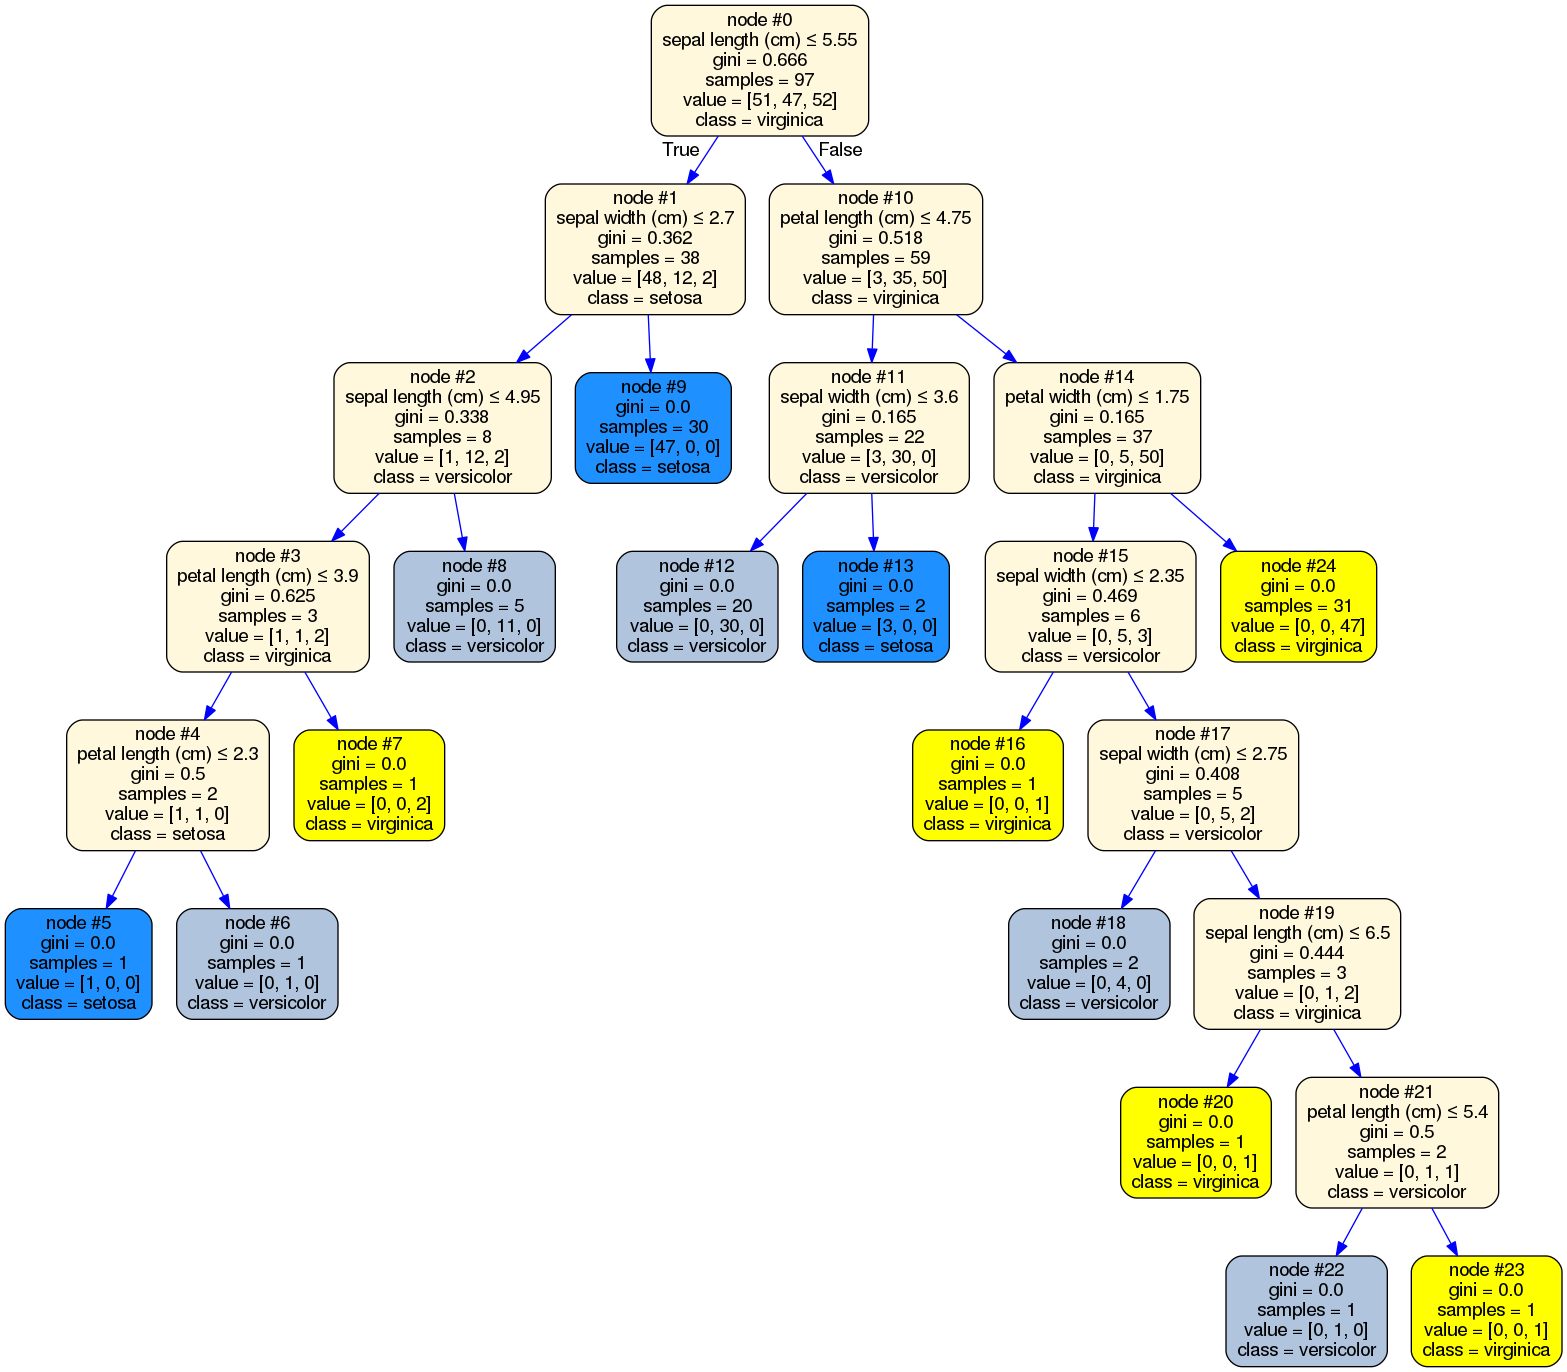

In [122]:
from IPython.display import Image
Image(graph.create_png())

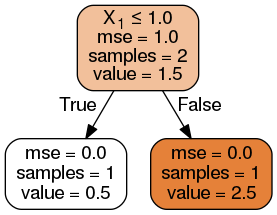

In [79]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

from IPython.display import Image
Image(graph.create_png())

In [80]:
type(clf)

sklearn.tree.tree.DecisionTreeRegressor

In [90]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label=<sepal length (cm) &le; 5.55<br/>gini = 0.666<br/>samples = 97<br/>value = [51, 47, 52]<br/>class = virginica>, fillcolor="#8139e503"] ;\n1 [label=<sepal width (cm) &le; 2.7<br/>gini = 0.362<br/>samples = 38<br/>value = [48, 12, 2]<br/>class = setosa>, fillcolor="#e58139b8"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<sepal length (cm) &le; 4.95<br/>gini = 0.338<br/>samples = 8<br/>value = [1, 12, 2]<br/>class = versicolor>, fillcolor="#39e581c4"] ;\n1 -> 2 ;\n3 [label=<petal length (cm) &le; 3.9<br/>gini = 0.625<br/>samples = 3<br/>value = [1, 1, 2]<br/>class = virginica>, fillcolor="#8139e555"] ;\n2 -> 3 ;\n4 [label=<petal length (cm) &le; 2.3<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1, 0]<br/>class = setosa>, fillcolor="#e5813900"] ;\n3 -> 4 ;\n5 [label=<gini = 0.0<br/>samples = 1<br/>value = [1, 0, 0]<br/>class 